In [5]:
import pandas as pd
import numpy as np
import glob
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict
%matplotlib inline

In [16]:
ls

-f1.csv                     metis_project_1/
More_Turnstiles.csv         more_turnstile_files/
More_Turnstiles_Backup.csv  my_file.txt
Nick_Project1.ipynb         turnstile/
Project1_Master.ipynb       turnstile_data.ipynb
Split_Turnstiles/           web.mta.info/
challenge_set_1_muhr.ipynb


In [17]:
# Reading year-long turnstile dataset
turnstile = pd.concat([pd.read_csv(f) for f in glob.glob('turnstile/*')], ignore_index = False)

In [24]:
turnstile.rename(columns = lambda x: x.strip(), inplace = True)
turnstile.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/19/2019,03:00:00,REGULAR,6914752,2344809
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/19/2019,07:00:00,REGULAR,6914764,2344821
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/19/2019,11:00:00,REGULAR,6914825,2344898
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/19/2019,15:00:00,REGULAR,6915047,2344971
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/19/2019,19:00:00,REGULAR,6915367,2345026


In [25]:
turnstile.reset_index(drop = True, inplace = True)
turnstile.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/19/2019,03:00:00,REGULAR,6914752,2344809
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/19/2019,07:00:00,REGULAR,6914764,2344821
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/19/2019,11:00:00,REGULAR,6914825,2344898
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/19/2019,15:00:00,REGULAR,6915047,2344971
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/19/2019,19:00:00,REGULAR,6915367,2345026


In [26]:
turnstile['COMBINED_INDICES'] = list(zip(turnstile['C/A'], turnstile['UNIT'], turnstile['SCP'], turnstile['STATION']))
turnstile['DATETIME'] = pd.to_datetime(turnstile['DATE'] + " " + turnstile['TIME'])

In [27]:
turnstile.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,COMBINED_INDICES,DATETIME
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/19/2019,03:00:00,REGULAR,6914752,2344809,"(A002, R051, 02-00-00, 59 ST)",2019-01-19 03:00:00
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/19/2019,07:00:00,REGULAR,6914764,2344821,"(A002, R051, 02-00-00, 59 ST)",2019-01-19 07:00:00
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/19/2019,11:00:00,REGULAR,6914825,2344898,"(A002, R051, 02-00-00, 59 ST)",2019-01-19 11:00:00
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/19/2019,15:00:00,REGULAR,6915047,2344971,"(A002, R051, 02-00-00, 59 ST)",2019-01-19 15:00:00
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/19/2019,19:00:00,REGULAR,6915367,2345026,"(A002, R051, 02-00-00, 59 ST)",2019-01-19 19:00:00


In [29]:
group_indices = ['COMBINED_INDICES', 'DATE', 'ENTRIES']

maxs = turnstile[group_indices].groupby(by = ['COMBINED_INDICES', 'DATE']).agg(max)
mins = turnstile[group_indices].groupby(by = ['COMBINED_INDICES', 'DATE']).agg(min)
daily_difference = maxs - mins

In [30]:
daily_difference.head()

ENTRIES
COMBINED_INDICES              DATE               
(A002, R051, 02-00-00, 59 ST) 01/01/2019      447
                              01/02/2019     1442
                              01/03/2019     1506
                              01/04/2019     1512
                              01/05/2019      728

In [31]:
turnstile['CA_UNIT_STATION'] = list(zip(turnstile['C/A'], turnstile['UNIT'], turnstile['STATION']))
turnstile.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,COMBINED_INDICES,DATETIME,CA_UNIT_STATION
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/19/2019,03:00:00,REGULAR,6914752,2344809,"(A002, R051, 02-00-00, 59 ST)",2019-01-19 03:00:00,"(A002, R051, 59 ST)"
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/19/2019,07:00:00,REGULAR,6914764,2344821,"(A002, R051, 02-00-00, 59 ST)",2019-01-19 07:00:00,"(A002, R051, 59 ST)"
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/19/2019,11:00:00,REGULAR,6914825,2344898,"(A002, R051, 02-00-00, 59 ST)",2019-01-19 11:00:00,"(A002, R051, 59 ST)"
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/19/2019,15:00:00,REGULAR,6915047,2344971,"(A002, R051, 02-00-00, 59 ST)",2019-01-19 15:00:00,"(A002, R051, 59 ST)"
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/19/2019,19:00:00,REGULAR,6915367,2345026,"(A002, R051, 02-00-00, 59 ST)",2019-01-19 19:00:00,"(A002, R051, 59 ST)"


In [125]:
turnstile['Day of Week'] = turnstile['DATETIME'].dt.dayofweek

In [32]:
group_indices = ['CA_UNIT_STATION', 'SCP', 'DATE', 'ENTRIES']

maxs = turnstile[group_indices].groupby(by = ['CA_UNIT_STATION', 'SCP', 'DATE']).agg(max)
mins = turnstile[group_indices].groupby(by = ['CA_UNIT_STATION', 'SCP', 'DATE']).agg(min)
daily_difference_scp = maxs - mins

In [33]:
daily_difference_scp.head()

ENTRIES
CA_UNIT_STATION     SCP      DATE               
(A002, R051, 59 ST) 02-00-00 01/01/2019      447
                             01/02/2019     1442
                             01/03/2019     1506
                             01/04/2019     1512
                             01/05/2019      728

In [34]:
group_indices = ['C/A', 'UNIT', 'SCP', 'STATION', 'DATE', 'ENTRIES']

maxs = turnstile[group_indices].groupby(by = ['STATION', 'UNIT', 'C/A', 'SCP', 'DATE']).agg(max)
mins = turnstile[group_indices].groupby(by = ['STATION', 'UNIT', 'C/A', 'SCP', 'DATE']).agg(min)
daily_net_per_turnstile = maxs - mins
daily_net_per_turnstile.loc[('59 ST', 'R051', 'A002', '02-00-00')].head()

,ENTRIES
DATE,
01/01/2019,447
01/02/2019,1442
01/03/2019,1506
01/04/2019,1512
01/05/2019,728


In [35]:
daily_net_per_turnstile.reset_index(inplace = True)
daily_net_per_turnstile.head()

,STATION,UNIT,C/A,SCP,DATE,ENTRIES
0,1 AV,R248,H007,00-00-00,01/01/2019,1457
1,1 AV,R248,H007,00-00-00,01/02/2019,3456
2,1 AV,R248,H007,00-00-00,01/03/2019,3785
3,1 AV,R248,H007,00-00-00,01/04/2019,3806
4,1 AV,R248,H007,00-00-00,01/05/2019,2149


In [104]:
group_indices = ['STATION', 'DATE', 'ENTRIES', '']

daily_net_per_station = daily_net_per_turnstile[group_indices].groupby(by = ['STATION', 'DATE']).agg(sum)
daily_net_per_station.head()

ENTRIES
STATION DATE               
1 AV    01/01/2019     8376
        01/02/2019    17985
        01/03/2019    19210
        01/04/2019    19694
        01/05/2019    12448

## Finding Median Daily Entries by Station

In [105]:
#Entries per station
daily_net_per_station.reset_index(inplace = True)

In [106]:
q25, q50, q75 = np.nanpercentile(daily_net_per_station['ENTRIES'], [25, 50, 75])
print(q25, q50, q75)

3237.25 6421.5 13719.75


In [107]:
recover = daily_net_per_station

In [114]:
daily_net_per_station.head()

,STATION,DATE,ENTRIES
0,1 AV,01/01/2019,8376.0
1,1 AV,01/02/2019,17985.0
2,1 AV,01/03/2019,19210.0
3,1 AV,01/04/2019,19694.0
4,1 AV,01/05/2019,12448.0


In [134]:
daily_net_per_station['DATETIME'] = pd.to_datetime(daily_net_per_station['DATE'])

#['Day of Week'] = turnstile['DATETIME'].dt.dayofweek

In [135]:
daily_net_per_station.head()

,STATION,DATE,ENTRIES,DATETIME
0,1 AV,01/01/2019,8376.0,2019-01-01
1,1 AV,01/02/2019,17985.0,2019-01-02
2,1 AV,01/03/2019,19210.0,2019-01-03
3,1 AV,01/04/2019,19694.0,2019-01-04
4,1 AV,01/05/2019,12448.0,2019-01-05


In [137]:
daily_net_per_station['Day of Week'] = daily_net_per_station['DATETIME'].dt.dayofweek

In [138]:
daily_net_per_station.loc[daily_net_per_station['ENTRIES'] > 200000, 'ENTRIES'] = q50
# Rows for daily net entries > 200,000 look completely bogus.
# Under 200,000 net entries the rows appear believable, i.e. multiple entries of 34 St Penn Station at ~150,000

In [141]:
daily_net_per_station.head(10)

,STATION,DATE,ENTRIES,DATETIME,Day of Week
0,1 AV,01/01/2019,8376.0,2019-01-01,1
1,1 AV,01/02/2019,17985.0,2019-01-02,2
2,1 AV,01/03/2019,19210.0,2019-01-03,3
3,1 AV,01/04/2019,19694.0,2019-01-04,4
4,1 AV,01/05/2019,12448.0,2019-01-05,5
5,1 AV,01/06/2019,10455.0,2019-01-06,6
6,1 AV,01/07/2019,18970.0,2019-01-07,0
7,1 AV,01/08/2019,19668.0,2019-01-08,1
8,1 AV,01/09/2019,20315.0,2019-01-09,2
9,1 AV,01/10/2019,20334.0,2019-01-10,3


In [130]:
daily_medians = daily_net_per_station[['STATION', 'ENTRIES']].groupby(by = 'STATION').agg({'ENTRIES': 'median'})

daily_medians.head()

,ENTRIES
STATION,
1 AV,16717.0
103 ST,27887.0
103 ST-CORONA,18689.5
104 ST,3326.0
110 ST,9653.0


In [131]:
top_10_daily_medians = daily_medians.sort_values(by = 'ENTRIES', ascending = False).head(10)
top_10_daily_medians.head(10)

,ENTRIES
STATION,
34 ST-PENN STA,153390.0
GRD CNTRL-42 ST,143600.0
34 ST-HERALD SQ,108367.0
23 ST,99017.0
42 ST-PORT AUTH,92689.0
FULTON ST,90364.0
14 ST-UNION SQ,85062.0
TIMES SQ-42 ST,83765.0
86 ST,71764.0


In [132]:
top_10_daily_medians.reset_index(inplace = True)
top_10_daily_medians.head()

,STATION,ENTRIES
0,34 ST-PENN STA,153390.0
1,GRD CNTRL-42 ST,143600.0
2,34 ST-HERALD SQ,108367.0
3,23 ST,99017.0
4,42 ST-PORT AUTH,92689.0


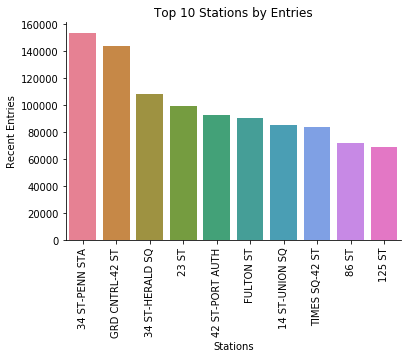

In [133]:
#Plotting top 10
ax = sns.barplot(x = top_10_daily_medians['STATION'], y = top_10_daily_medians['ENTRIES'],data=top_10_daily,palette = sns.color_palette("husl", 10))
ax.set(xlabel='Stations', ylabel='Recent Entries')
ax.set_title('Top 10 Stations by Entries')
plt.xticks(rotation=90)
sns.despine();

## Daily Means per Station

In [175]:
daily_means_weekly = daily_net_per_station[['STATION', 'ENTRIES','Day of Week']].groupby(by = ['STATION', 'Day of Week']).agg({'ENTRIES': 'mean'})

In [176]:
daily_means_weekly.head(10)

ENTRIES
STATION Day of Week              
1 AV    0            15817.779661
        1            17275.050847
        2            18004.661017
        3            18011.322034
        4            18247.237288
        5             8542.745763
        6             6837.813559
103 ST  0            26281.322034
        1            28493.915254
        2            28709.669492

In [184]:
daily_means_weekly.reset_index(inplace = True)
daily_means_weekly.head()

,STATION,Day of Week,ENTRIES
0,1 AV,0,15817.779661
1,1 AV,1,17275.050847
2,1 AV,2,18004.661017
3,1 AV,3,18011.322034
4,1 AV,4,18247.237288


In [165]:
daily_means_weekly_for_heatmap.sort_values(by = 'ENTRIES', ascending = False)
daily_means_weekly_for_heatmap = daily_net_per_station[['STATION', 'ENTRIES','Day of Week']].groupby(by = ['STATION','Day of Week']).agg({'ENTRIES': 'mean'})

In [241]:
top_5_list = ['34 ST-PENN STA','GRD CNTRL-43 ST','34 ST-HEARLD SQ','23 ST','42 ST-PORT AUTH']
top_5_stations = daily_means_weekly[~daily_means_weekly['STATION'].str.contains('COURT SQ')]
top_5_stations = top_5_stations[top_5_stations['STATION'].str.contains('34 ST-PENN|GRD CNTRL|34 ST-HERALD|23 ST|42 ST-PORT')]



In [242]:
top_5_stations.head(10)

,STATION,Day of Week,ENTRIES
322,23 ST,0,91778.262712
323,23 ST,1,103657.957627
324,23 ST,2,104222.076271
325,23 ST,3,106286.406780
326,23 ST,4,90934.694915
327,23 ST,5,45404.372881
328,23 ST,6,35859.288136
413,34 ST-HERALD SQ,0,103356.313559
414,34 ST-HERALD SQ,1,109811.991525
415,34 ST-HERALD SQ,2,114603.796610


In [219]:
result

Day of Week,0,1,2,3,4,5,6
STATION,,,,,,,
23 ST,91778.262712,103657.957627,104222.076271,106286.406780,90934.694915,45404.372881,35859.288136
34 ST-HERALD SQ,103356.313559,109811.991525,114603.796610,111593.271186,110421.500000,58464.415254,48572.237288
34 ST-PENN STA,144719.974576,154444.974576,150665.076271,153938.389831,138927.474576,73499.347458,63376.855932
42 ST-PORT AUTH,88292.389831,93804.135593,94592.864407,95337.864407,90237.347458,54337.627119,45984.881356
GRD CNTRL-42 ST,132440.612069,140381.405172,144147.982759,148095.112069,134815.439655,50894.017241,39491.474138


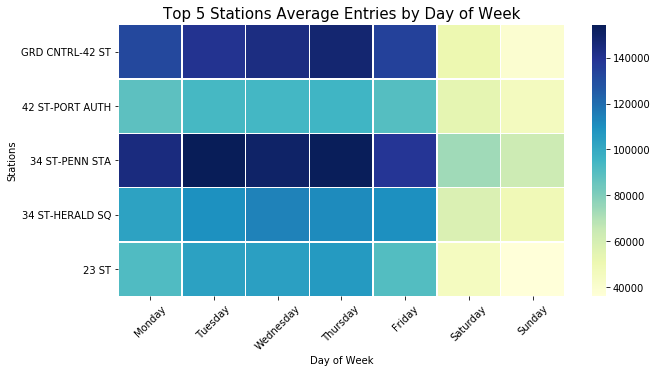

In [250]:
result = top_5_stations.pivot(index= 'STATION', columns='Day of Week', values='ENTRIES')
plt.figure(figsize = (10,5))
g = sns.heatmap(result, annot=False, fmt="g", cmap='YlGnBu', linewidth = 0.5)
g.invert_yaxis()
g.set_title("Top 5 Stations Average Entries by Day of Week", fontsize = 15)
g.set(ylabel='Stations')
g.set_xticklabels(['Monday', 'Tuesday', 'Wednesday','Thursday','Friday','Saturday','Sunday'], rotation = 45)
plt.show();